# Global Database of Power (Generation)

### A brief look at the growth selected power generating segments of the U.S. power grid

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
generators = pd.read_csv('global_database_of_power/global_power_plant_database.csv')

#### Take a look at the meta information of the dataset to get an understanding of the data types I am working with

In [3]:
# Get a feel for the columns in the dataset and data types used
generators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29910 entries, 0 to 29909
Data columns (total 24 columns):
country                     29910 non-null object
country_long                29910 non-null object
name                        29910 non-null object
gppd_idnr                   29910 non-null object
capacity_mw                 29910 non-null float64
latitude                    29910 non-null float64
longitude                   29910 non-null float64
primary_fuel                29910 non-null object
other_fuel1                 1963 non-null object
other_fuel2                 303 non-null object
other_fuel3                 104 non-null object
commissioning_year          16303 non-null float64
owner                       19531 non-null object
source                      29895 non-null object
url                         29892 non-null object
geolocation_source          29491 non-null object
wepp_id                     16381 non-null object
year_of_capacity_data       13743 non-null

#### Narrow the focus of the data set to information that I can work with 

In [4]:
us_generators = generators[(generators.commissioning_year > 0) & 
                                 (generators.year_of_capacity_data > 0) & 
                                 (generators.generation_gwh_2013 > 0) & 
                                 (generators.generation_gwh_2014 > 0) & 
                                 (generators.generation_gwh_2015 > 0) & 
                                 (generators.generation_gwh_2016 > 0) & 
                                 (generators.generation_gwh_2017 > 0) & 
                                 (generators.country_long == 'United States of America')]

us_generators = us_generators[['country_long', 'primary_fuel', 'commissioning_year', 'capacity_mw']]
us_generators[['commissioning_year']] = us_generators[['commissioning_year']].astype(int)

us_generators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5024 entries, 20849 to 29534
Data columns (total 4 columns):
country_long          5024 non-null object
primary_fuel          5024 non-null object
commissioning_year    5024 non-null int32
capacity_mw           5024 non-null float64
dtypes: float64(1), int32(1), object(2)
memory usage: 176.6+ KB


#### Check to see if there is a pattern of growth over time

This plot looks at the number of power generating facilites brought online in the United States since 1900. The plot does not differentiate among the methods of power generation.  The points between 2000 and 2020 seem to indicate incomplete data. 

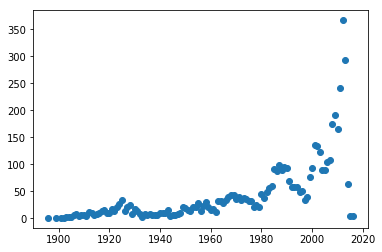

In [23]:
us_all = us_generators.groupby('commissioning_year').count()
plt.scatter(us_all.index, us_all.primary_fuel)
plt.show()

#### Try to get a sense of what the fuel mix is for U.S. power generation over the reporting period.

This plot attempts to capture the relative representation of fuel sources for all U.S. power sources.  It measures the total contribution of each fuel source over the life of the data set.  Hydro power is the clear winner, benefitting from large scale projects in the American West.  

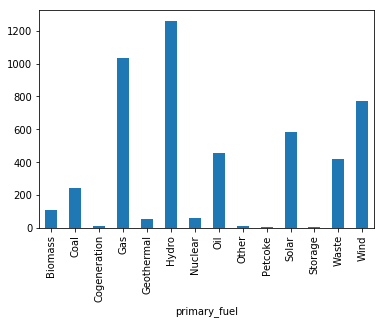

In [27]:
us_generators.groupby(['primary_fuel']).capacity_mw.count().plot(kind='bar')

#### Create an intermediate set of power generation sources to plot with

In [25]:
us_gas = us_generators[(us_generators.primary_fuel == 'Gas')]
us_solar = us_generators[(us_generators.primary_fuel == 'Solar')]
us_waste = us_generators[(us_generators.primary_fuel == 'Waste')]
us_wind = us_generators[(us_generators.primary_fuel == 'Wind')]
us_coal = us_generators[(us_generators.primary_fuel == 'Coal')]

#### Is the general growth trend reflected for a specific primary fuel?

Natural Gas is the second most productive fuel source for electricity generation.  This appears to be related to the number of facilites involved in production as opposed the capacity of production.  The commissioning of Natural Gas facailites is also cluster after 1990.  

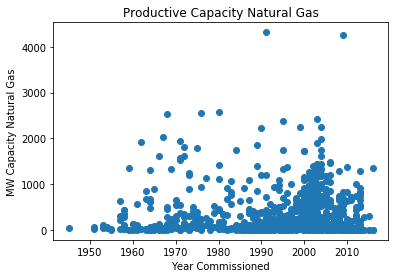

In [26]:
plt.scatter(us_gas.commissioning_year, us_gas.capacity_mw)
plt.xlabel('Year Commissioned')
plt.ylabel('MW Capacity Natural Gas')
plt.title('Productive Capacity Natural Gas')

plt.show()

#### Growth comparision between five fuel types.

The number of generation facilities comming online each year suggests that the power industry is moving away from fossil fuels.  Coal is the long term loser.  This is demonstrated by the declining additional output from coal sources.  Renewables have been adding substantial capacity in recent years 

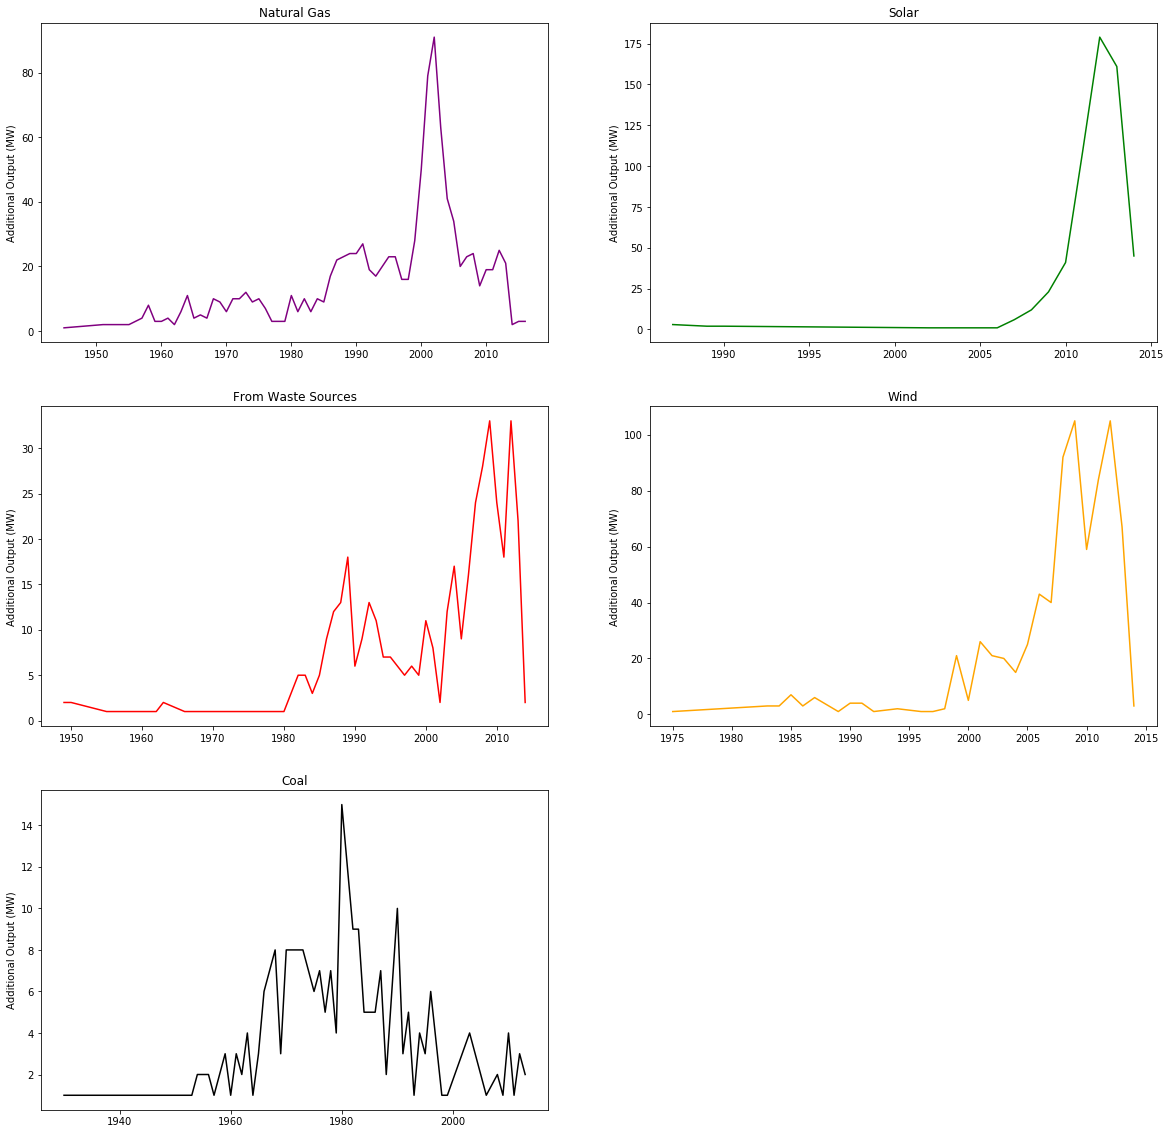

In [12]:
ng_growth = us_gas.groupby(['commissioning_year']).primary_fuel.agg(['count'])
solar_growth = us_solar.groupby(['commissioning_year']).primary_fuel.agg(['count'])
waste_growth = us_waste.groupby(['commissioning_year']).primary_fuel.agg(['count'])
wind_growth = us_wind.groupby(['commissioning_year']).primary_fuel.agg(['count'])
coal_growth = us_coal.groupby(['commissioning_year']).primary_fuel.agg(['count'])

plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
plt.plot(ng_growth['count'], color='purple')
plt.ylabel('Additional Output (MW)')
plt.title('Natural Gas')

plt.subplot(3,2,2)
plt.plot(solar_growth['count'], color='green')
plt.ylabel('Additional Output (MW)')
plt.title('Solar')

plt.subplot(3,2,3)
plt.plot(waste_growth['count'], color='red')
plt.ylabel('Additional Output (MW)')
plt.title('From Waste Sources')

plt.subplot(3,2,4)
plt.plot(wind_growth['count'], color='orange')
plt.ylabel('Additional Output (MW)')
plt.title('Wind')

plt.subplot(3,2,5)
plt.plot(coal_growth['count'], color='black')
plt.ylabel('Additional Output (MW)')
plt.title('Coal')

plt.show()